# Classification. Linear models and KNN

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Part 1: Implementing Logistic Regression

In this task you need to implement Logistic Regression with l2 regularization using gradient descent algorithm.

Logistic Regression loss:
$$ L(w) = \dfrac{1}{N}\sum_{i=1}^N \log(1 + e^{-\langle w, x_i \rangle y_i}) + \frac{1}{2C} \lVert w \rVert^2  \to \min_w$$
$$\langle w, x_i \rangle = \sum_{j=1}^n w_{j}x_{ij} + w_{0},$$ $$ y_{i} \in \{-1, 1\}$$ where $n$ is the number of features and $N$ is the number of samples.

Gradient descent step:
$$w^{(t+1)} := w^{(t)} + \dfrac{\eta}{N}\sum_{i=1}^N y_ix_i \Big(1 - \dfrac{1}{1 + exp(-\langle w^{(t)}, x_i \rangle y_i)}\Big) - \eta \frac{1}{C} w,$$
where $\eta$ is the learning rate.

**(2 points)** Implement the algorithm and use it to classify the digits (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) into "even" and "odd" categories. "Even" and "Odd" classes  should correspond to {-1, 1} labels.

Stopping criteria: either the number of iterations exceeds *max_iter* or $||w^{(t+1)} - w^{(t)}||_2 < tol$.

In [3]:
from sklearn.exceptions import NotFittedError

In [4]:
class CustomLogisticRegression:
    _estimator_type = "classifier"
    
    def __init__(self, eta=0.001, max_iter=1000, C=1.0, tol=1e-5, random_state=42, zero_init=False):
        """Logistic Regression classifier.
        
        Args:
            eta: float, default=0.001
                Learning rate.
            max_iter: int, default=1000
                Maximum number of iterations taken for the solvers to converge.
            C: float, default=1.0
                Inverse of regularization strength; must be a positive float.
                Smaller values specify stronger regularization.
            tol: float, default=1e-5
                Tolerance for stopping criteria.
            random_state: int, default=42
                Random state.
            zero_init: bool, default=False
                Zero weight initialization.
        """
        self.eta = eta
        self.max_iter = max_iter
        self.C = C
        self.tol = tol
        self.random_state = np.random.RandomState(seed=random_state)
        self.zero_init = zero_init
         
    def get_sigmoid(self, X, weights):
        
        get_sigmoid = 1/(1 + np.exp(-X @ weights))
        return get_sigmoid
        """Compute the sigmoid value."""
        # <your code>
        #pass
    
    def get_loss(self, x, weights, y):
        """Calculate the loss."""
        #X_ext = np.hstack([np.ones((x.shape[0], 1)), x])
        #print(np.exp(-np.transpose((np.transpose(X_ext.dot(weights)) * y))))
        get_loss = np.mean(np.log(1 + np.exp((-np.transpose((np.transpose(x.dot(weights)) * y))))), axis = 0) + np.sum(weights ** 2)/2*self.C
        return get_loss
        # <your code>
        #pass
     
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X]) # a constant feature is included to handle intercept
        num_features = X_ext.shape[1]
        if self.zero_init:
            self.weights_ = np.zeros(num_features) 
        else:
            weight_threshold = 1.0 / (2 * num_features)
            self.weights_ = self.random_state.uniform(low=-weight_threshold,
                                                      high=weight_threshold, size=num_features) # random weight initialization
        self.Loss_value = []
        for i in range(self.max_iter):
            self.Loss_value.append((i,self.get_loss(X_ext, self.weights_,y)))
            delta = -np.mean (np.transpose((np.transpose(X_ext) * y) * (1-(1/(1+np.exp(-np.transpose((np.transpose(X_ext.dot(self.weights_)) * y))))))), axis = 0) + self.weights_/self.C
            self.weights_ -= self.eta * delta
            #if "<your code>":
            if np.sqrt(np.sum(delta ** 2)) < self.tol:
                break
     
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing positive class probabilities.
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X])
        if hasattr(self, 'weights_'):
            return self.get_sigmoid(X_ext, self.weights_)
        else: 
            raise NotFittedError("CustomLogisticRegression instance is not fitted yet")
    
    def predict(self, X):
        """Predict classes.
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        # <your code>
        p_pred = self.predict_proba(X)
        y_pred = []
        for i in p_pred:
            if i >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(-1)
        return y_pred

In [5]:
from sklearn import datasets
from sklearn import metrics

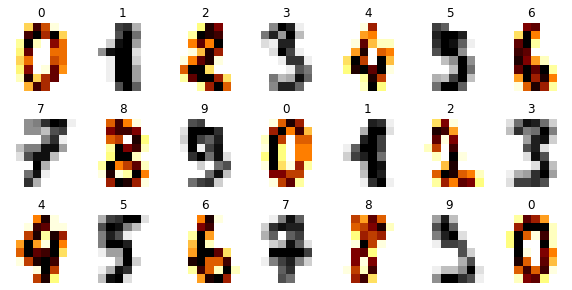

In [6]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
#y_train = "<your code>"
#y_test = "<your code>"
y_train = (y_train % 2) * 2 - 1
y_test = (y_test % 2) * 2 - 1

In [7]:
assert (np.unique(y_train) == [-1, 1]).all()
assert (np.unique(y_test) == [-1, 1]).all()

In [8]:
def fit_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    disp = metrics.plot_confusion_matrix(clf, X_test, y_test, normalize='true')
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()
    
    return metrics.accuracy_score(y_pred=clf.predict(X_train), y_true=y_train), \
           metrics.accuracy_score(y_pred=clf.predict(X_test), y_true=y_test)

In [9]:
lr_clf = CustomLogisticRegression(max_iter=1, zero_init=True)

In [10]:
assert np.allclose(lr_clf.get_sigmoid(np.array([[0.5, 0, 1.0], [0.3, 1.3, 1.0]]), np.array([0.5, -0.5, 0.1])),
                   np.array([0.58662, 0.40131]))

In [11]:
lr_clf.fit(X_train, y_train)

In [12]:
assert np.allclose(lr_clf.weights_, np.array([ 3.1000e-06,  0.0000e+00,  4.1800e-05,  5.4770e-04,  2.2130e-04,
        4.8750e-04,  1.3577e-03,  5.9780e-04,  5.6400e-05, -7.0000e-07,
        1.6910e-04,  2.5190e-04, -4.3700e-04,  3.6190e-04,  1.0049e-03,
        4.2280e-04,  2.5700e-05,  3.0000e-07, -1.1500e-05, -7.2440e-04,
       -2.6200e-04,  8.7540e-04,  4.1540e-04, -8.4200e-05, -5.2000e-06,
        0.0000e+00, -2.2160e-04, -5.7130e-04,  9.8570e-04,  1.3507e-03,
        5.0210e-04, -1.7050e-04, -1.0000e-06,  0.0000e+00, -6.7810e-04,
       -1.0515e-03, -4.4500e-05,  3.7160e-04,  4.2100e-04, -8.1800e-05,
        0.0000e+00, -5.2000e-06, -5.3410e-04, -2.0393e-03, -8.4310e-04,
        1.0400e-04, -1.2390e-04, -1.7880e-04, -1.3200e-05, -4.5000e-06,
       -9.4300e-05, -1.1127e-03, -5.0900e-04, -2.1850e-04, -5.6050e-04,
       -3.9560e-04, -1.7700e-05, -3.0000e-07,  2.6800e-05,  6.3920e-04,
        1.8090e-04, -7.3660e-04, -5.3930e-04, -3.7060e-04, -2.8200e-05]), atol=1e-5)

In [13]:
lr_clf.weights_

array([ 3.13152401e-06,  0.00000000e+00,  4.17536534e-05,  5.47668754e-04,
        2.21294363e-04,  4.87473904e-04,  1.35768963e-03,  5.97773138e-04,
        5.63674322e-05, -6.95894224e-07,  1.69102296e-04,  2.51913709e-04,
       -4.37021573e-04,  3.61864997e-04,  1.00487126e-03,  4.22755741e-04,
        2.57480863e-05,  3.47947112e-07, -1.14822547e-05, -7.24425887e-04,
       -2.62004175e-04,  8.75434934e-04,  4.15448852e-04, -8.42032011e-05,
       -5.21920668e-06,  0.00000000e+00, -2.21642310e-04, -5.71329158e-04,
        9.85734168e-04,  1.35073069e-03,  5.02087683e-04, -1.70494085e-04,
       -1.04384134e-06,  0.00000000e+00, -6.78148921e-04, -1.05149617e-03,
       -4.45372303e-05,  3.71607516e-04,  4.21016006e-04, -8.17675713e-05,
        0.00000000e+00, -5.21920668e-06, -5.34098817e-04, -2.03931802e-03,
       -8.43075852e-04,  1.04036186e-04, -1.23869172e-04, -1.78844816e-04,
       -1.32219903e-05, -4.52331246e-06, -9.42936674e-05, -1.11273486e-03,
       -5.09046625e-04, -

In [14]:
model = CustomLogisticRegression()

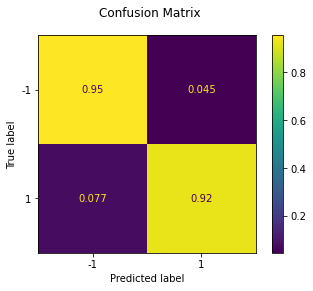

In [15]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [16]:
train_acc, test_acc

(0.9109255393180237, 0.9388888888888889)

In [17]:
assert min(train_acc, test_acc) > 0.9

**(0.5 points)** Visualize the loss history.

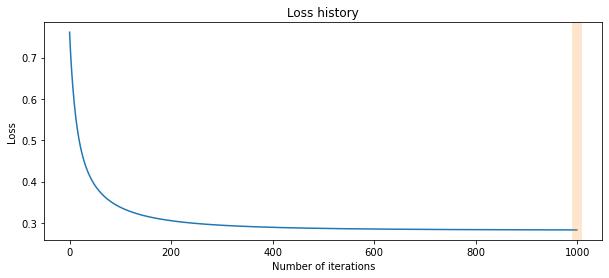

In [18]:
data = pd.DataFrame(model.Loss_value, columns=[0,1]) 
plt.figure(figsize=(10,4))
sns.lineplot(x=data[0], y=data[1])
plt.axvline(data[0][np.argmin(data[1])], color='C1', lw=10, alpha=0.2)
plt.title('Loss history')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

На графике мы видим, что при увеличении количества итераций потеря логической регрессии уменьшается. Наименьшее значение достигается 1000 итерации.  

**(0.5 points)** Try different learning rates and compare the results. How does the learning rate influence the convergence?

Для начала посмотрим как скорость обучения будет влиять на качество нашей модели.

In [19]:
def plot_fitting_graph(x, model_train_acc, model_test_acc, xlabel, ylabel, 
                       custom_metric=None, custom_label='', custom_scale='log', title='Fitting graph'):
    plt.figure(figsize=(15, 7))
    plt.plot(x, model_train_acc, label='Training')
    plt.plot(x, model_test_acc, color='C1', label='Validation')
    plt.axvline(x[np.argmax(model_test_acc)], color='C1', lw=10, alpha=0.2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.xticks(x, rotation='vertical')
    plt.legend(loc='center left')        
    if custom_metric:
        plt.twinx()
        plt.yscale(custom_scale)
        plt.plot(x, custom_metric, alpha=0.2, lw=4, ls='dotted', color='black', label=custom_label) 
        plt.legend(loc='center right')         
    plt.show()

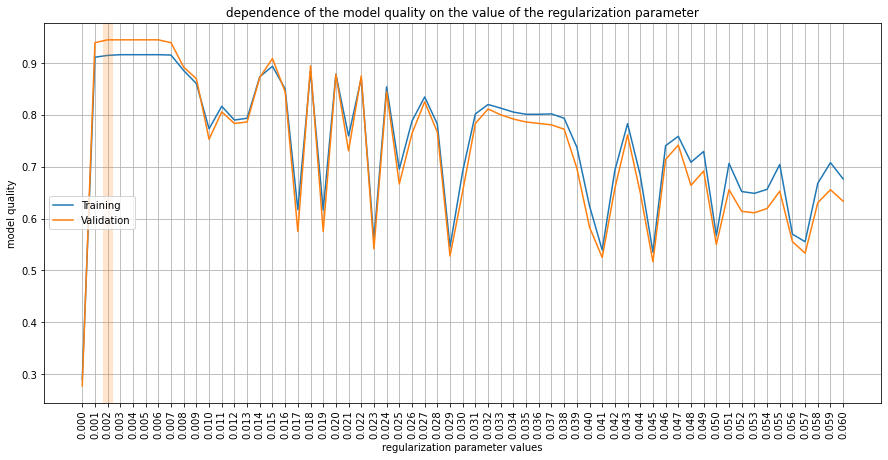

In [20]:
eta_values = np.linspace(0, 0.06, 1 + 60)
model_train_acc, model_test_acc  = [], []
for i in eta_values:
    model = CustomLogisticRegression(eta = i)
    model.fit(X_train, y_train)
    model_train_acc.append(metrics.accuracy_score(y_pred=model.predict(X_train), y_true=y_train))
    model_test_acc.append(metrics.accuracy_score(y_pred=model.predict(X_test), y_true=y_test))
plot_fitting_graph(eta_values, model_train_acc, model_test_acc, xlabel='regularization parameter values', ylabel='model quality', 
                   title='dependence of the model quality on the value of the regularization parameter')  

Исходя из графика мы видим, что скорость обучения существенно влияет на качество модели. С увеличением скорости качество модели снижается. Это объясняется тем, что мы увеличиваем шаг градиентного спуска, тем самым можем неправильно определить локальный минимум функции. Построим график зависимости потерь логической регрессии от скорости обучения.

In [21]:
def plot_fitting_graph_new(x, y, eta, xlabel, ylabel, 
                       custom_metric=None, custom_label='', custom_scale='log', title='Fitting graph'):
    plt.figure(figsize=(9, 5))
    plt.plot(x, y, label='eta = {0}'.format(eta))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()             
    plt.show()

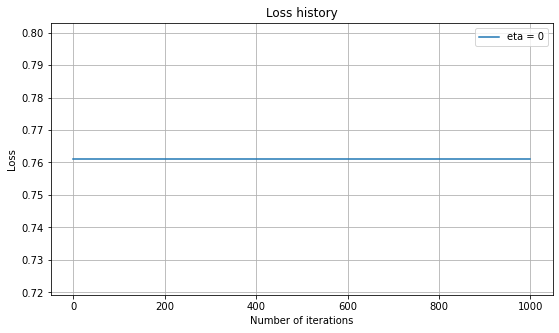

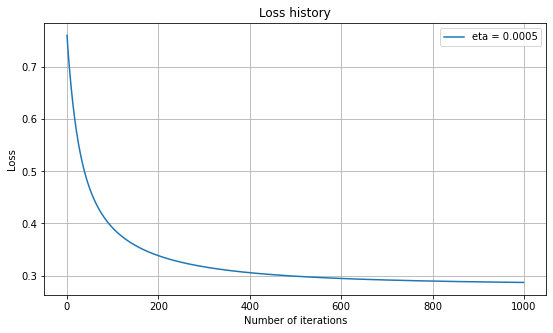

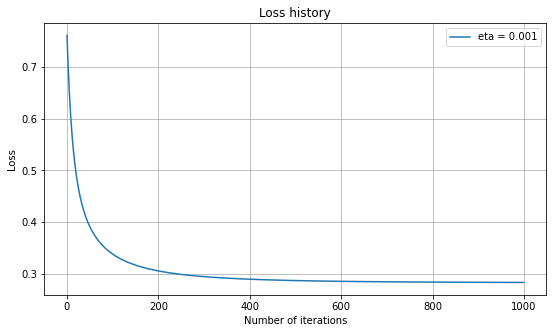

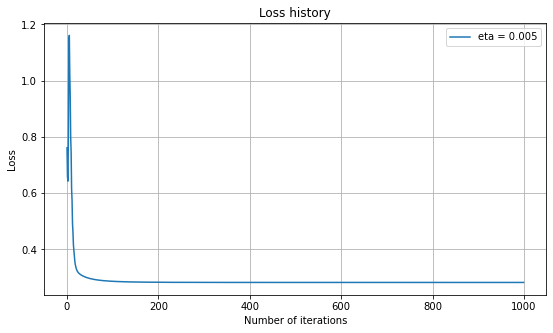

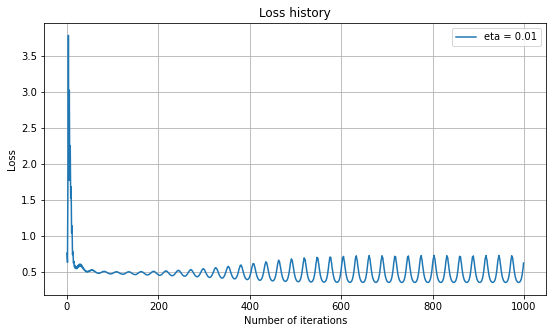

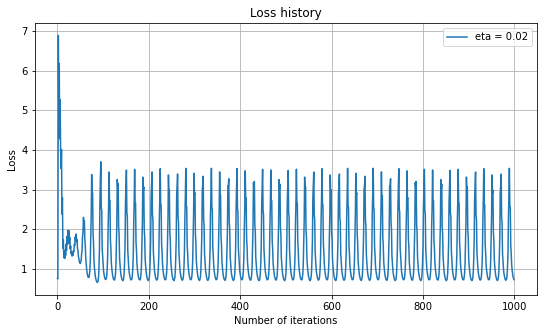

In [22]:
eta_values = [0, 0.0005, 0.001, 0.005, 0.01, 0.02] # возьмем различные скорости
for i in eta_values:
    model = CustomLogisticRegression(eta = i)
    model.fit(X_train, y_train)
    data = pd.DataFrame(model.Loss_value, columns=[0,1])
    plot_fitting_graph_new(data[0], data[1], i, xlabel='Number of iterations', ylabel='Loss', 
                   title='Loss history')

На данном графике мы видим изменения потерь логической регрессии при изменении скорости обучения. Это объясняется тем, что при увеличении скорости увеличивается шаг градиентного спуска тем самым изменяется и потеря логической регрессии.

**(0.5 points)** Try different regularization parameter values and compare the model quality.

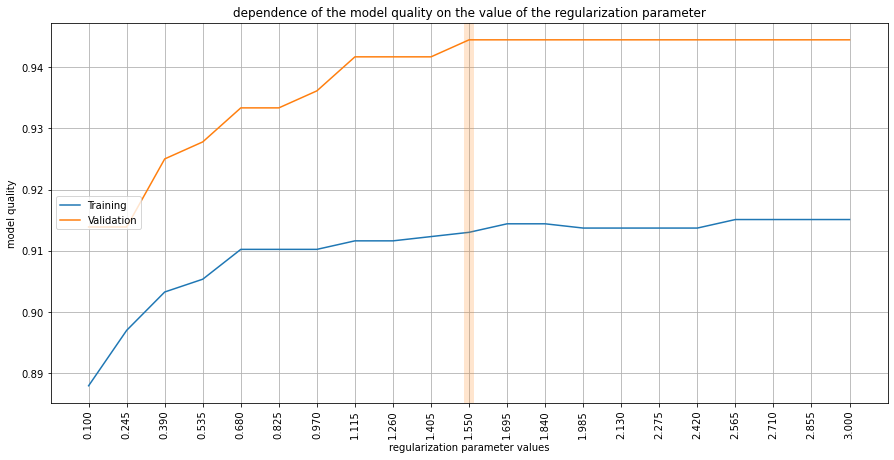

In [23]:
С_values = np.linspace(0.1, 3, 1 + 20)
model_train_acc, model_test_acc  = [], []
for i in С_values:
    model = CustomLogisticRegression(C = i)
    model.fit(X_train, y_train)
    model_train_acc.append(metrics.accuracy_score(y_pred=model.predict(X_train), y_true=y_train))
    model_test_acc.append(metrics.accuracy_score(y_pred=model.predict(X_test), y_true=y_test))
plot_fitting_graph(С_values, model_train_acc, model_test_acc, xlabel='regularization parameter values', ylabel='model quality', 
                   title='dependence of the model quality on the value of the regularization parameter')    

При увеличении значения параметра модели, качество, как и на обучающей выборке так и на тестовой начинает улучшаться до значения 1.550 (исходя из графика для тестового набора). Далее качество практически не изменяется.

**(0.5 points)** Compare zero initialization and random initialization. 

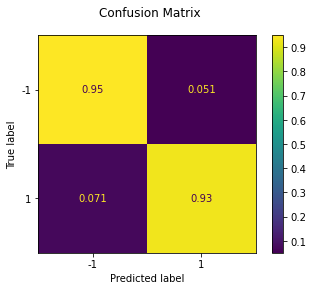

(0.9116214335421016, 0.9388888888888889)

In [24]:
model = CustomLogisticRegression(zero_init=True)
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)
train_acc, test_acc

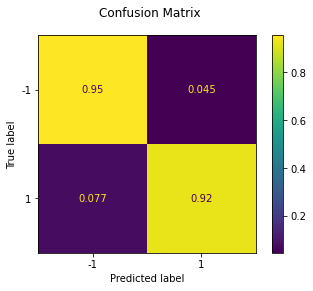

(0.9109255393180237, 0.9388888888888889)

In [25]:
model = CustomLogisticRegression(zero_init=False)
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)
train_acc, test_acc

Из расчетов видно, что при использовании нулевой и случайной инициализации, качество модели практически не изменилось. Рассмотрим, как они повлияют на потери логической регрессии.

In [26]:
def plot_fitting_graph_new(x, y, eta, xlabel, ylabel, 
                       custom_metric=None, custom_label='', custom_scale='log', title='Fitting graph'):
    plt.figure(figsize=(9, 5))
    plt.plot(x, y, label='zero_init = {0}'.format(eta))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()             
    plt.show()

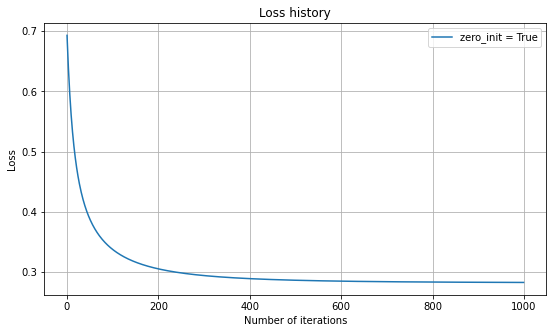

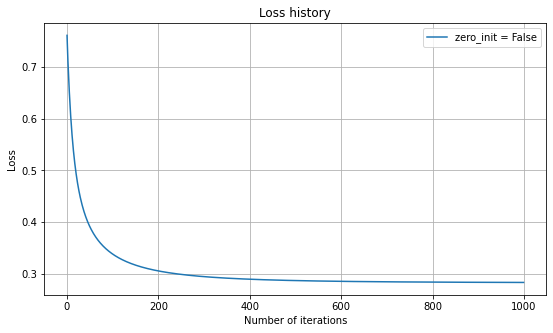

In [27]:
zero_init = [True, False]
for i in zero_init:
    model = CustomLogisticRegression(zero_init = i)
    model.fit(X_train, y_train)
    data = pd.DataFrame(model.Loss_value, columns=[0,1])
    plot_fitting_graph_new(data[0], data[1], i, xlabel='Number of iterations', ylabel='Loss', 
                   title='Loss history')

На графике потерь логической регрессии мы так же сильного изменения не наблюдаем. Построим график качества модели от нулевой и случайной инициализации.

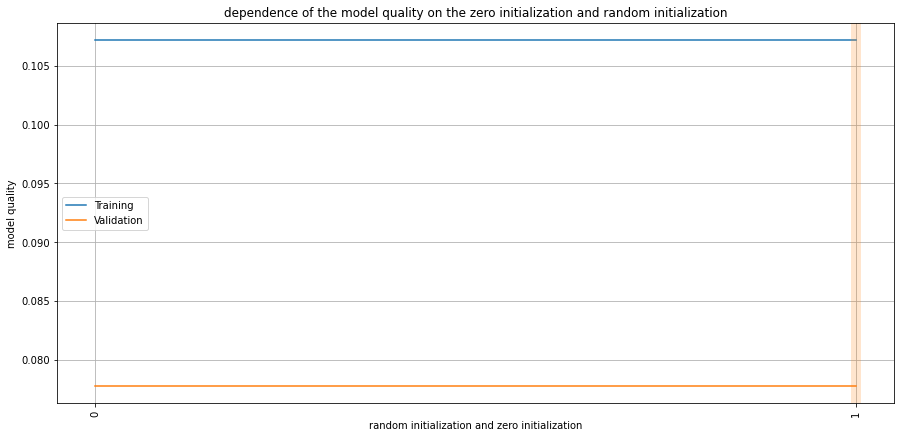

In [40]:
zero_init = [True, False]
model_train_acc, model_test_acc  = [], []
for i in zero_init:
    model = CustomLogisticRegression(zero_init = i)
    model.fit(X_train, y_train)
    model_train_acc.append(metrics.accuracy_score(y_pred=model.predict(X_train), y_true=y_train))
    model_test_acc.append(metrics.accuracy_score(y_pred=model.predict(X_test), y_true=y_test))
plot_fitting_graph(zero_init, model_train_acc, model_test_acc, xlabel='random initialization and zero initialization', ylabel='model quality', 
                   title='dependence of the model quality on the zero initialization and random initialization') 

Из графика видно, что при использовании нулевой инициализации качество модели на обучающем наборе несущественно увеличивается. Хотя обычно используют случайную инициализацию, так как она нарушает симметрии и получается более точная модель. 

## Part 2: Implementing KNN Classifier

In this task you need to implement weighted K-Neighbors Classifier.

Recall that training a KNN classifier is simply memorizing a training sample. 

The process of applying a classifier for one object is to find the distances from it to all objects in the training data, then select the k nearest objects (neighbors) and return the most common class among these objects.

You can also give the nearest neighbors weights in accordance with the distance of the object to them. In the simplest case (as in your assignment), you can set the weights inversely proportional to that distance. 

$$w_{i} = \frac{1}{d_{i} + eps},$$

where $d_{i}$ is the distance between object and i-th nearest neighbor and $eps$ is the small value to prevent division by zero.

In case of 'uniform' weights, all k nearest neighbors are equivalent (have equal weight, for example $w_{i} = 1, \forall i \in(1,k)$).

To predict the probability of classes, it is necessary to normalize the weights of each class, dividing them by the sum:

$$p_{i} = \frac{w_{i}}{\sum_{j=1}^{c}w_{j}},$$

where $p_i$ is probability of i-th class and $c$ is the number of classes.

**(2 points)** Implement the algorithm and use it to classify the digits. By implementing this algorithm, you will be able to classify numbers not only into "even" or "odd", but into their real representation.

In [30]:
class CustomKNeighborsClassifier:
    _estimator_type = "classifier"
    
    def __init__(self, n_neighbors=5, weights='uniform', eps=1e-9):
        """K-Nearest Neighbors classifier.
        
        Args:
            n_neighbors: int, default=5
                Number of neighbors to use by default for :meth:`kneighbors` queries.
            weights : {'uniform', 'distance'} or callable, default='uniform'
                Weight function used in prediction.  Possible values:
                - 'uniform' : uniform weights.  All points in each neighborhood
                  are weighted equally.
                - 'distance' : weight points by the inverse of their distance.
                  in this case, closer neighbors of a query point will have a
                  greater influence than neighbors which are further away.
            eps : float, default=1e-5
                Epsilon to prevent division by 0 
        """
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.eps = eps
        
    
    def get_pairwise_distances(self, X, Y):
        """
        Returnes matrix of the pairwise distances between the rows from both X and Y.
        Args:
            X: numpy array of shape (n_samples, n_features)
            Y: numpy array of shape (k_samples, n_features)
        Returns:
            P: numpy array of shape (n_samples, k_samples)
                Matrix in which (i, j) value is the distance 
                between i'th row from the X and j'th row from the Y.
        """
        X_2 = np.sum(X**2, axis =1).reshape((X.shape[0],1)) * np.ones(shape=(1,Y.shape[0]))
        Y_2 = np.sum(Y**2, axis =1) * np.ones(shape=(X.shape[0],1))
        pairwise_distances = np.sqrt(X_2 + Y_2 -2 * X.dot(np.transpose(Y)))
        return pairwise_distances
        # <your code>
        #pass
    
    
    def get_class_weights(self, y, weights):
        """
        Returns a vector with sum of weights for each class 
        Args:
            y: numpy array of shape (n_samles,)
            weights: numpy array of shape (n_samples,)
                The weights of the corresponding points of y.
        Returns:
            p: numpy array of shape (n_classes)
                Array where the value at the i-th position 
                corresponds to the weight of the i-th class.
        """
        class_weights = dict.fromkeys(self.classes_,0)
        for i in range(len(weights)):
            class_weights[y[i]] += weights[i]
        return list(class_weights.values())
        #pass
            
        
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        self.points = X
        self.y = y
        self.classes_ = np.unique(y)
        
        
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples, n_classes)
                Vector containing positive class probabilities.
        """
        if hasattr(self, 'points'):
            P = self.get_pairwise_distances(X, self.points)
            small_dist=np.sort(P, axis = 1)[:, : self.n_neighbors]
            y_small_dist = self.y[P.argsort(axis=1)[:, :self.n_neighbors]]
            #weights_of_points = np.ones(P.shape)
            weights_of_points = np.ones(small_dist.shape)
            if self.weights == 'distance':
                #weights_of_points = 'your code'
                weights_of_points = 1/(small_dist + self.eps)
            weights_i = np.array([self.get_class_weights(y_small_dist[i],weights_of_points[i]) for i in range(weights_of_points.shape[0])])
            Y_probability = weights_i / np.sum(weights_i, axis = 1)[:,None]
            return Y_probability
                
            # <your code>
            #pass
        
        else: 
            raise NotFittedError("CustomKNeighborsClassifier instance is not fitted yet")
            
        
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        Y_predict = self.predict_proba(X)
        return Y_predict.argmax(axis = 1)
        # <your code>
        #pass

In [31]:
model = CustomKNeighborsClassifier(n_neighbors=5, weights='distance')
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [32]:
assert np.allclose(model.get_pairwise_distances(np.array([[0  , 1]  , [1, 1]]), 
                                                np.array([[0.5, 0.5], [1, 0]])),
                   np.array([[0.70710678, 1.41421356],
                             [0.70710678, 1.        ]]))

In [33]:
model.classes_ = ['one', 'two', 'three']
assert np.allclose(model.get_class_weights(np.array(['one', 'one', 'three', 'two']), np.array([1, 1, 0, 4])), 
                   np.array([2,4,0]))

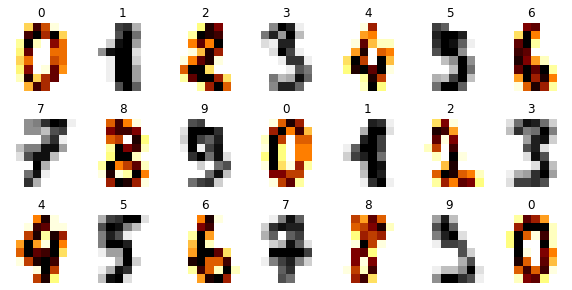

In [34]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [35]:
model.fit(X_train, y_train)
knn.fit(X_train, list(map(str, y_train)));

In [36]:
assert np.allclose(model.predict_proba(X_test), knn.predict_proba(X_test))

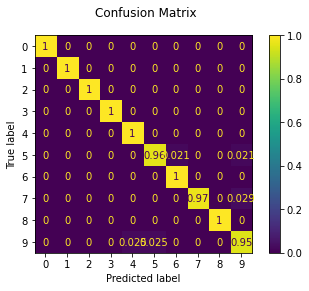

In [37]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [38]:
assert train_acc == 1
assert test_acc > 0.98

**(0.5 points)** Take a look at the confusion matrix and tell what numbers the model confuses and why this happens.

Проанализировав матрицу, мы видим, что модель путает следующие числа: 
* число 5 с 6 и 9
* число 7 с 9
* число 9 с 4 и 5
Это происходим потому, что данные числа похожи в написании (большое количество пикселей данных чисел совпадают)

**(0.5 points)** Try different n_neighbors parameters and compare the output probabilities of the model.

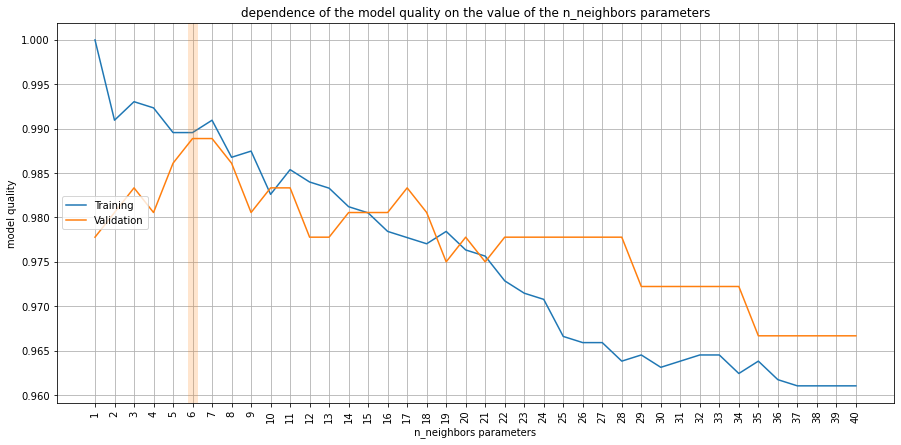

In [49]:
n_neighbors = np.linspace(1, 40, 1 + 39)
model_train_acc, model_test_acc  = [], []
for i in n_neighbors:
    model = CustomKNeighborsClassifier(n_neighbors = int(i))
    model.fit(X_train, y_train)
    model_train_acc.append(metrics.accuracy_score(y_pred=model.predict(X_train), y_true=y_train))
    model_test_acc.append(metrics.accuracy_score(y_pred=model.predict(X_test), y_true=y_test))
plot_fitting_graph(n_neighbors, model_train_acc, model_test_acc, xlabel=' n_neighbors parameters ', ylabel='model quality', 
                   title='dependence of the model quality on the value of the n_neighbors parameters')  

Исходя из графика мы видим, что при изменении количества соседей (параметр n_neighbors) существенно меняется качество модели. Оптимальным для данного набора является значение равное 6 после чего наблюдаем ухудшения качества модели. Так же мы можем сказать, что при низких значениях большое влияние на качество модели оказывает шум, а при больших значения существенно уменьшается скорость обработки. 

**(0.5 points)** Compare both 'uniform' and 'distance' weights and share your thoughts in what situations which parameter can be better.

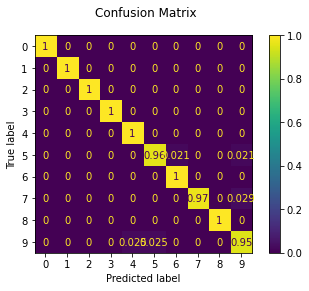

In [55]:
model = CustomKNeighborsClassifier(n_neighbors=5, weights='distance')
model.fit(X_train, y_train)
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [59]:
print(f'При weights=distance на обучающей выборке: {train_acc}') 
print(f'При weights=distance на тестовой выборке: {test_acc}') 


При weights=distance на обучающей выборке: 1.0
При weights=distance на тестовой выборке: 0.9861111111111112


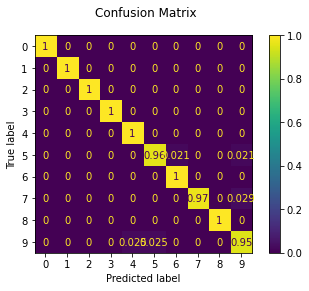

In [60]:
model = CustomKNeighborsClassifier(n_neighbors=5, weights='uniform')
model.fit(X_train, y_train)
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [61]:
print(f'При weights=uniform на обучающей выборке: {train_acc}') 
print(f'При weights=uniform на тестовой выборке: {test_acc}') 

При weights=uniform на обучающей выборке: 0.9895615866388309
При weights=uniform на тестовой выборке: 0.9861111111111112


Мы видим, что в методе 'distance' вероятность на обучающей выборке больше, чем при методе 'uniform' и равна 1. В зависимости от распределения, количества выбросов и границ между классами используются данные методы. Метод 'uniform' отличается тем, что если  например некоторые из ближайших соседей находятся незначительно дальше он все равно будет их учитывать при прогнозировании, а метод 'distance' наоборот будет данных соседей игнорировать и не использовать при прогнозировании.

**(0.5 points)** Suggest another distance measurement function that could improve the quality of the classification for this task. 

Для данной модели мы можем использовать несколько функция которые возможно улучшат качество модели:
* Манхэттенское расстояние – данный метод рекомендуется использовать с данными большого размера и если переменные не похожи по типу.
* Стандартизированное евклидовое расстояние – суть в том, что если распределение данных не одинаково, перед расчетом производится нормализация (каждый параметр к среднему значению и дисперсии)


**(0.5 points)** Suggest different task and distance function that you think would be suitable for it.

Предположим, мы крупная it-компания и перед нами стоит задача отобрать на проект несколько десятков программистов. У нас есть большая база с сотрудниками и их проектами, в которых они участвовали в различных направления. Нам надо составить модель, которая предсказала бы уложиться данный программист в срок или нет. Для данной задачи в модели KNN лучше использовать расстояние Манхэттена, так как он более предпочтительней для данных больших размеров. Так же расстояние Манхэттена уменьшит все ошибки в равной степени, поскольку градиент имеет постоянную величину.

## Part 3: Synthetic Titanic Survival Prediction

### Dataset

Read the description here: https://www.kaggle.com/c/tabular-playground-series-apr-2021/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/tabular-playground-series-apr-2021/overview/evaluation.  


In [62]:
PATH = "./data/"

In [63]:
data = pd.read_csv(os.path.join(PATH, 'titanic', 'train.csv')).set_index('PassengerId')

In [64]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [65]:
print(f'Количество строк: {data.shape[0]}') 
print(f'Количество столбцов: {data.shape[1]}')

Количество строк: 100000
Количество столбцов: 11


Проверяем данные на наличие дубликатов

In [66]:
print(f'Количество дубликатов: {data.duplicated().sum()}')

Количество дубликатов: 0


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

In [67]:
value_female = data.Sex[data['Sex'] == 'female'].count()
print(f'Количество женщин в наборе данных: {value_female}')

Количество женщин в наборе данных: 43886


In [68]:
value_male = data.Sex[data['Sex'] == 'male'].count()
print(f'Количество мужчин в наборе данных: {value_male}')

Количество мужчин в наборе данных: 56114


In [69]:
value_survived = data.Survived[data['Survived'] == '1'].count()
print(f'Количество выживших пассажиров в наборе данных: {value_male}')

Количество выживших пассажиров в наборе данных: 56114


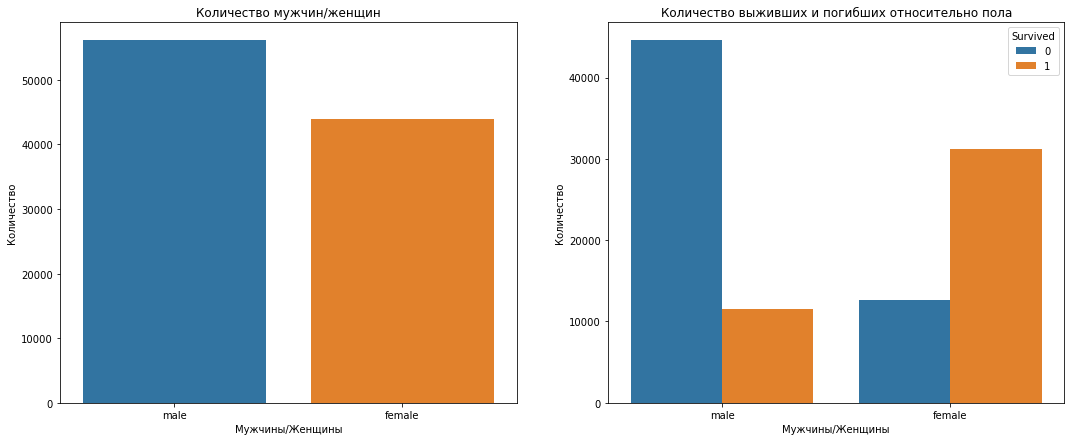

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(18,7))
sns.countplot(x=data['Sex'], ax=ax[0]).set_title("Количество мужчин/женщин")
ax[0].set(xlabel='Мужчины/Женщины', ylabel='Количество')
sns.countplot(x=data['Sex'], hue=data['Survived'], ax=ax[1]).set_title("Количество выживших и погибших относительно пола")
ax[1].set(xlabel='Мужчины/Женщины', ylabel='Количество')
plt.show()

In [71]:
print('% Выживших мужчин: ', data['Survived'][data['Sex']== 'male' ].value_counts()[1]/value_male*100)
print('% Выживших женщин: ', data['Survived'][data['Sex']== 'female'].value_counts()[1]/value_female*100)

% Выживших мужчин:  20.579534519014864
% Выживших женщин:  71.15253155903933


На основании графиков и расчётов мы видим, что несмотря на то, что на борту 56.11% пассажиров были мужчины, процент выживших составляет всего 20.5 %. У женщин ситуация гораздо лучше, среди 43.89% женщин на борту выжило 71.15%. Тем самым мы видим связь между полом пассажира и выживанием. Это логично так как в первую очередь спасали женщин и детей.

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

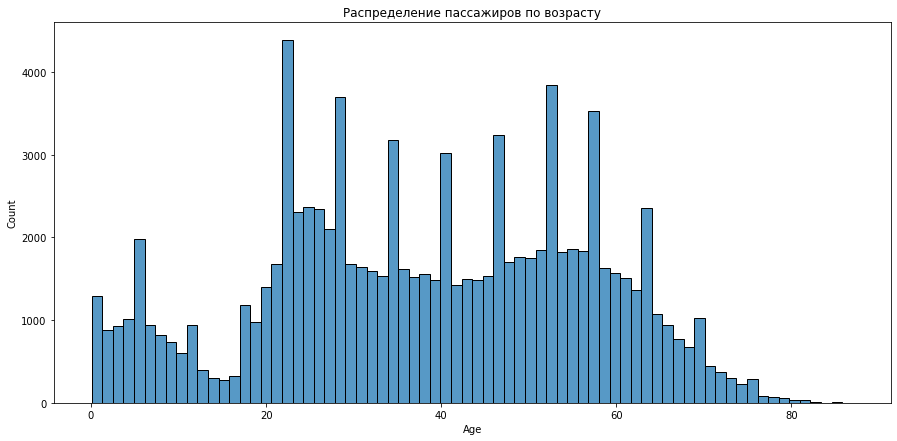

In [79]:
plt.figure (figsize = (15,7))
sns.histplot(data=data, x="Age").set_title("Распределение пассажиров по возрасту")
plt.show()

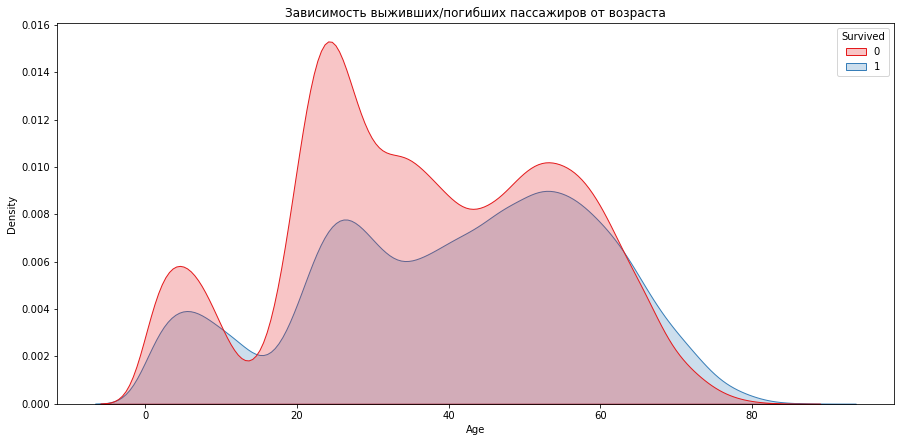

In [78]:
plt.figure (figsize = (15,7))
sns.kdeplot(x='Age',data=data, hue='Survived', shade=True, palette="Set1" ).set_title("Зависимость выживших/погибших пассажиров от возраста")
plt.show()

In [84]:
Age_Survived_0 = data[data['Survived'] == 0]['Age'].mean()

In [85]:
print(f'Средний возраст умерших пассажиров: {Age_Survived_0}')

Средний возраст умерших пассажиров: 36.708694881533724


In [86]:
Age_Survived_1 = data[data['Survived'] == 1]['Age'].mean()

In [87]:
print(f'Средний возраст выживших пассажиров: {Age_Survived_1}')

Средний возраст умерших пассажиров: 40.55379931430776


диапазоне от 20 до 40 лет. Соотношение выживших и погибших пассажиров от 40 лет примерно одинаковое. Так же можно отметить, что у детей в возрасте от 0 до 10 лет вероятность выжить незначительно меньше. Это связанно с тем, что в первую очередь спасали детей, женщин и пожилых людей, а на основании проделанной работы во 2 модуле мы можем сказать, что в диапазоне от 20 до 40 лет как раз преобладали именно мужчины, особенно 3 класса.

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

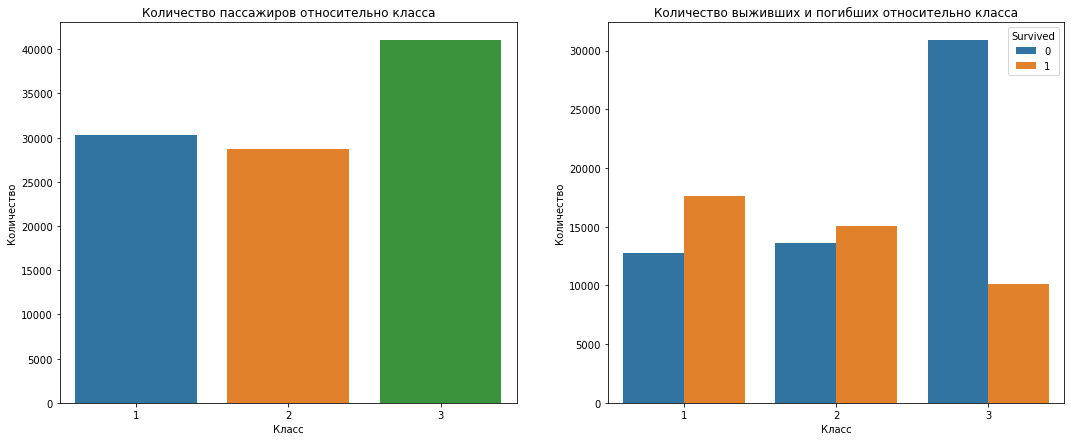

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(18,7))
sns.countplot(x=data['Pclass'], ax=ax[0]).set_title("Количество пассажиров относительно класса")
ax[0].set(xlabel='Класс', ylabel='Количество')
sns.countplot(x=data['Pclass'], hue=data['Survived'], ax=ax[1]).set_title("Количество выживших и погибших относительно класса")
ax[1].set(xlabel='Класс', ylabel='Количество')
plt.show()

In [89]:
data.groupby('Pclass').Survived.count()

Pclass
1    30315
2    28679
3    41006
Name: Survived, dtype: int64

In [90]:
data.groupby('Pclass').Survived.sum()

Pclass
1    17576
2    15057
3    10141
Name: Survived, dtype: int64

In [91]:
data.groupby('Pclass').Survived.sum()/data.groupby('Pclass').Survived.count()*100

Pclass
1    57.977899
2    52.501831
3    24.730527
Name: Survived, dtype: float64

Исходя из графиков и расчётов мы видим, что по 1 и 2 классу процент выживания составляет 57.9% и 52.5%. В 3 классе процент выживания составляет всего 24.73%, однако при этом наибольшее число пассажиров (41%) принадлежали 3 классу. Это можно объяснить тем что каюты пассажиров 3 класса находились нижних частях корабля и тем самым им было сложнее добираться до спасательных шлюпках. Самый безопасный был 1 класс(каюты в верхней части корабля).

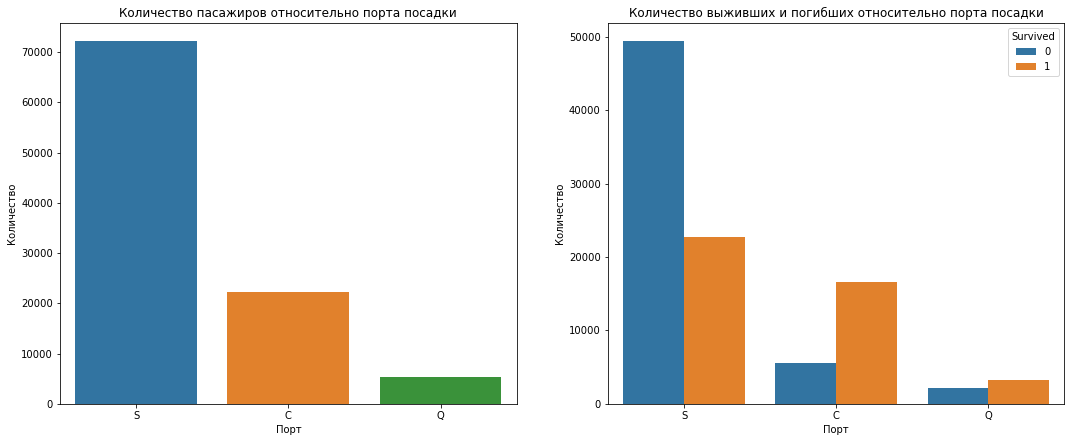

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(18,7))
sns.countplot(x=data['Embarked'], ax=ax[0]).set_title("Количество пасажиров относительно порта посадки")
ax[0].set(xlabel='Порт', ylabel='Количество')
sns.countplot(x=data['Embarked'], hue=data['Survived'], ax=ax[1]).set_title("Количество выживших и погибших относительно порта посадки")
ax[1].set(xlabel='Порт', ylabel='Количество')
plt.show()

In [93]:
data.groupby('Embarked').Survived.count()

Embarked
C    22187
Q     5424
S    72139
Name: Survived, dtype: int64

In [94]:
data.groupby('Embarked').Survived.sum()

Embarked
C    16669
Q     3238
S    22745
Name: Survived, dtype: int64

In [95]:
data.groupby('Embarked').Survived.sum()/data.groupby('Embarked').Survived.count()*100

Embarked
C    75.129580
Q    59.697640
S    31.529409
Name: Survived, dtype: float64

Исходя из графиков и расчетов мы видим наличие взаимосвязи между портом посадки и выживанием. Наибольшее количество пассажиров (72.38%) садились в порту Саутгемптон (S), из которых выжило 31%. Это связано с тем, что пассажиров плывших на корабле из порта Саутгемптон (S) 3 классом составляло около 36% от всех пассажиров. При этом основную часть из них составляли мужчины (около 70%). А как мы выяснили ранее наименьший процент выживания был у мужчин плывших 3 классом.(на основании этих расчетов и 2 модуля)

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

Произведем обнаружение отсутствующих данных в наборе с помощью тепловой карты и процентного списка

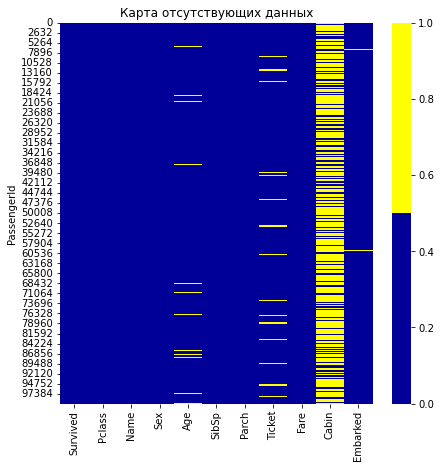

In [96]:
plt.figure(figsize=(7,7))
colours =['#000099','#ffff00']
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))
plt.title('Карта отсутствующих данных')
plt.show()

Процентный список пропущенных данных

In [123]:
for col in data.columns:
    print('{} - {} %'.format(col, np.mean(data[col].isnull()*100)))

Survived - 0.0 %
Pclass - 0.0 %
Name - 0.0 %
Sex - 0.0 %
Age - 3.292 %
SibSp - 0.0 %
Parch - 0.0 %
Ticket - 4.623 %
Fare - 0.134 %
Cabin - 67.866 %
Embarked - 0.25 %


Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

< your thoughts >

* В признаках 'Age' и 'Fare' отсутствие данных составляет 3.3% и 0.13%, что является не существенным на данном объеме данных. В результате можно воспользоваться методом принудительного заполнения пропусков. На основании 2 модуля пропуски в цене билета и возрасте лучше заменить средним значением от класса которым плывет пассажир;
* В признаке 'Cabin' отсутствие данных составляет 67%, что является существенным пропуском данных. В таком случае считается лучше удалить всю колонку, так как пропуск слишком высок для использования данных в анализе. Но на основании проделанной работы во 2 модуле мы знаем, что существует взаимосвязь между наличием данных о каюте и выживших пассажиров. Поэтому заменим данный признак на бинарный (0 - данные отсутствуют, 1 - присутствуют);
* В признаке 'Embarked' отсутствие данных составляет 0.25%. В связи с минимальным пропуском предлагаю заменить пропущенные значения на порт, в котором садились наибольшее число пассажиров. (порт Саутгемптон(S)).
* Признаки 'Name', 'Ticket', 'PassengerId’ является уникальными для всех. Поэтому я считаю целесообразно их удалить, хотя не исключаю возможность при объединении этих признаков с другими появления какой-нибудь взаимосвязи. Минус от того, что я удаляю признак 'Ticket' в том что наш набор данных небольшой и удаление считается не лучшим вариантом.
* Признаки 'SibSp' и 'Parch' имеют кошенные распределения. Количество пассажиров, у которых не было родственников на борту составляет более 70%. Это приводит к дисбалансу классов, что может отрицательно сказаться на обучающую модель. Для снижения дисбаланса мы создадим новую переменную 'Family'.


**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import re

Загрузим наборы данных для обучения и теста.

In [99]:
train_data = pd.read_csv('data/titanic/train.csv')
test_data = pd.read_csv('data/titanic/test.csv')

In [100]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


Создадим функцию, которая будет масштабировать признаки датасета.

In [143]:
def scaler_data(data, columns):
    scaler = StandardScaler()
    scaler.fit(data[columns])
    data[columns] = scaler.transform(data[columns])
    return data

Так же создадим функцию для подготовки нашего набора данных для обучения и теста.

In [131]:
def processing_data (data):
    useless_columns = ['Name','Ticket','PassengerId'] # удаляем так как они уникальные
    data = data.drop(columns=useless_columns)
    data['Age'] = data.groupby('Pclass')['Age'].transform(lambda group: group.fillna(group.mean())) # избавляемся от пропусков
    data['Fare'] = data.groupby('Pclass')['Fare'].transform(lambda group: group.fillna(group.mean()))
    data.loc[:, 'Family'] = np.where((data.Parch>0) | (data.SibSp>0), 1, 0) #создаем новый параметр на основании 'Parch' и 'SibSp'
    data['Cabin']=np.where(data['Cabin'].isnull(),0,1) # заменяем на 1 - если есть, данные 0 - нет
    data['Embarked'] = data['Embarked'].fillna('S') # избавляемся от пропуска (используем самый часто встречаемый порт)
    sex = {'male' : 0, 'female' : 1} # перевод в бинарный вид
    data['Sex']=data['Sex'].map(sex)
    Embarked = {'S' : 0, 'C' : 1, 'Q' : 2} 
    data['Embarked']=data['Embarked'].map(Embarked)
    #data = pd.get_dummies(data, columns=['Pclass','Embarked','Sex','SibSp','Parch'])
    return data

Обработаем входные данные для обучающей модели.

In [135]:
y_train = train_data['Survived']
data_train = train_data.drop(columns='Survived')
x_train =processing_data(data_train)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,1,0,44.774464,2,0,27.14,1,0,1
1,3,0,33.407362,0,0,13.35,0,0,0
2,3,0,0.330000,1,2,71.29,0,0,1
3,3,0,19.000000,0,0,13.04,0,0,0
4,3,0,25.000000,0,0,7.76,0,0,0
...,...,...,...,...,...,...,...,...,...
99995,2,1,62.000000,0,0,14.86,1,1,0
99996,2,0,66.000000,0,0,11.15,0,0,0
99997,3,0,37.000000,0,0,9.95,0,0,0
99998,3,0,51.000000,0,1,30.92,0,0,1


In [144]:
x_train = scaler_data(x_train, ['Age','Fare'])
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,1,0,0.356242,2,0,-0.241390,1,0,1
1,3,0,-0.274216,0,0,-0.439660,0,0,0
2,3,0,-2.108799,1,2,0.393390,0,0,1
3,3,0,-1.073298,0,0,-0.444117,0,0,0
4,3,0,-0.740517,0,0,-0.520031,0,0,0
...,...,...,...,...,...,...,...,...,...
99995,2,1,1.311629,0,0,-0.417949,1,1,0
99996,2,0,1.533483,0,0,-0.471291,0,0,0
99997,3,0,-0.074956,0,0,-0.488544,0,0,0
99998,3,0,0.701531,0,1,-0.187042,0,0,1


Построим и обучим две модели (KNN и логистическую регрессию) для прогнозирования выживаемости пассажиров Титаника.

In [136]:
model_log = LogisticRegression(max_iter=10000)
model_log.fit(x_train, y_train)
cross_val_score(model_log, x_train, y_train, scoring='accuracy', cv=5).mean()

0.7578699999999999

In [128]:
model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(x_train, y_train)
cross_val_score(model_KNN, x_train, y_train, scoring='accuracy', cv=5).mean()

0.7298000000000001

Мы видим, что на одинаковой выборке логистическая регрессия показала лучший результат чем KNN. Поэтому в дальнейшем анализе и построении обучающей модели для тестового набора будем использовать логистическую регрессию.

**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

Select the best model, load the test set and make the predictions. Submit them to kaggle and see the results :)

**Note**. X points will depend on your kaggle public leaderboard score.
$$ f(score) = 1.0, \ \ 0.79 \leq score < 0.80,$$
$$ f(score) = 2.5, \ \ 0.80 \leq score < 0.81,$$ 
$$ f(score) = 4.0, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.

Посмотрим, как улучшиться наша модель при изменении параметра C (обратная сила регуляризации). Так как проводились испытания на различных диапазонах, покажем последний результат.

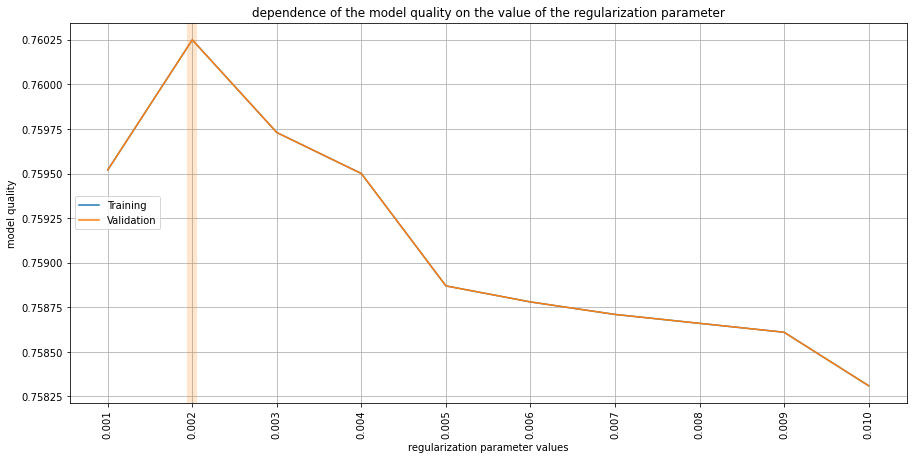

In [129]:
С_values = np.linspace(0.001, 0.01, 1 + 9)
model_train_acc, model_test_acc  = [], []
for i in С_values:
    model = LogisticRegression(C = i, max_iter = 10000)
    model.fit(x_train, y_train)
    model_train_acc.append(cross_val_score(model, x_train, y_train, scoring='accuracy', cv=3).mean())
plot_fitting_graph(С_values, model_train_acc, model_train_acc, xlabel='regularization parameter values', ylabel='model quality', 
                   title='dependence of the model quality on the value of the regularization parameter')    

Мы видим, что оптимальное значение параметра С равно 0.002

Проводились проверки качества модели при различных параметрах регуляризации. Оптимальный вариант получился следующий:

In [145]:
model_log = LogisticRegression(C=0.002, max_iter = 10000, solver='sag', penalty='l2',random_state =15,class_weight='balanced')
model_log.fit(x_train, y_train)
cross_val_score(model_log, x_train, y_train, scoring='accuracy', cv=5).mean()

0.7647800000000001

При оптимальных параметрах мы получили качество модели равное 0.76421. Посмотрим, как данная модель поведет себя на тестовой выборке.

Подготовим тестовый набор для модели.

In [146]:
x_test = processing_data(test_data)
x_test = scaler_data(x_test, ['Age','Fare'])
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,3,0,-0.836762,0,0,0.270708,0,0,0
1,3,1,1.623047,0,0,-0.606907,0,0,0
2,1,1,-0.836762,0,0,-0.099057,1,1,0
3,2,0,-0.402678,0,0,-0.497666,0,0,0
4,1,1,-0.981457,0,2,-0.283479,1,1,1
...,...,...,...,...,...,...,...,...,...
99995,3,1,-0.257983,0,0,-0.540779,0,2,0
99996,1,0,2.057132,1,0,0.352025,0,0,1
99997,3,0,1.188963,0,0,-0.529272,0,0,0
99998,1,1,1.333658,1,2,-0.240672,1,1,1


In [147]:
out = pd.DataFrame()
out['PassengerId'] = test_data.PassengerId
out['Survived'] = model_log.predict(x_test)
out.to_csv('data/titanic/my_submission.csv', index=False)

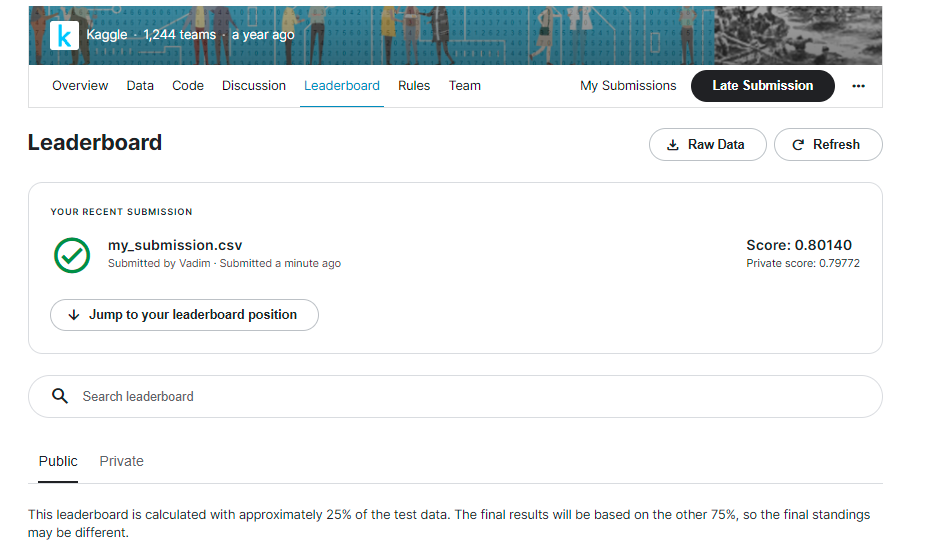

По результатам проверки предсказаний нашей модели на платформе kaggle мы достигли вероятности равной 0.8014. Тем самым мы можем сказать, что наша модель хорошо обучилась.